# scRNAseq downstream analysis

Based on Jupyter Notebook created by Lauren Sanders.

### Script: Zip all files for scanpy (optional):

In [797]:
# Set the working folder:
root_folder = './test/'

In [798]:
# Define the file extensions we are looking for
extensions = ('.tsv', '.mtx')
#load libraries:
import os
import gzip
import shutil
# Function to find and zip files
def zipper(root_folder):
 
    # Walk through the directory, including subdirectories
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            # Check if the file is in a 'filtered' subdirectory:
            if 'filtered' in root:
                # Check for the desired file extension:
                if file.endswith(extensions):
                    file_path = os.path.join(root, file)
                    output_path = file_path + '.gz'  # Create the .gz filename
                    
                    # Zip the file:
                    with open(file_path, 'rb') as f_in:
                        with gzip.open(output_path, 'wb') as f_out:
                            shutil.copyfileobj(f_in, f_out)
                    
                    print(f"Successfully zipped: {file_path} to {output_path}")
                else:
                    print(f"Skipping non-target file: {file}")
#execute the function:
zipper(root_folder)

Successfully zipped: ./test/RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene\filtered\barcodes.tsv to ./test/RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene\filtered\barcodes.tsv.gz
Successfully zipped: ./test/RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene\filtered\features.tsv to ./test/RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene\filtered\features.tsv.gz
Successfully zipped: ./test/RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene\filtered\matrix.mtx to ./test/RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene\filtered\matrix.mtx.gz
Successfully zipped: ./test/RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene\filtered\barcodes.tsv to ./test/RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene\filtered\barcodes.tsv.gz
Skipping non-target file: barcodes.tsv.gz
Successfully zipped: ./test/RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene\filtered\features.tsv to ./test/RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene\filtered\features.tsv.gz
Skipping non-target file: features.tsv.gz
Successfully zipped: ./test/RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene\filtered\matrix.mtx to ./test/RRRM2_Femur_BM_FLT_LAR_OLD_FO1

### Script: prepare marker table for scoreCT (optional):

In [201]:
# Load libraries:
import pandas as pd

# Load inputs:
df_input = 'GL-DPPD-7111_Mmus_BoneMarrow_CellType_GeneMarkers.csv'
df_output = 'GL-DPPD-7111_Mmus_BoneMarrow_CellType_GeneMarkers_filtered.gmt'
column_name = 'cellName'
column_gene = 'geneSymbol'

# Load data:
df = pd.read_csv(df_input)
df = pd.DataFrame(df)

# Select only cellName and geneSymbol:
df_selected = df[[column_name, column_gene]]

# Create new columns for each representing gene:
df_split = df_selected[column_gene].str.split(',', expand=True)

# Concatenate the "one" column with the newly split columns
df_result = pd.concat([df[[column_name]], df_split], axis=1)

# Add the second column with "na" values
df_result.insert(1, 'na_column', 'na')

# Save results as tab-delimited file:
df_result.to_csv(df_output, sep='\t', header=False, index=False)


### Downstream analysis - chunk by chunk:

#### Module0: Structure.py
- Generate folder structure: plots and AnnData results

In [660]:
import os

def Structure():
    # Define folder names
    folders = ['plots', 'AnnData']
    
    # Create the folders if they don't exist
    for folder in folders:
        if not os.path.exists(folder):
            os.makedirs(folder)
            print(f"Folder '{folder}' created.")
        else:
            print(f"Folder '{folder}' already exists.")


#### Module1: __main__.py

Folder 'plots' already exists.
Folder 'AnnData' already exists.
Processing directory: ./test\RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene\filtered
... reading from cache file cache\test-RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene-filtered-matrix.h5ad
Filter out cells expressing fewer than: 333.95000000000005 genes (5th percentile)
Filter out genes detected in fewer than: 24.75 cells (1th percentile)
Filtered data saved to RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene_filtered.h5ad
Gene threshold: 333.95000000000005
Cell threshold: 24.75


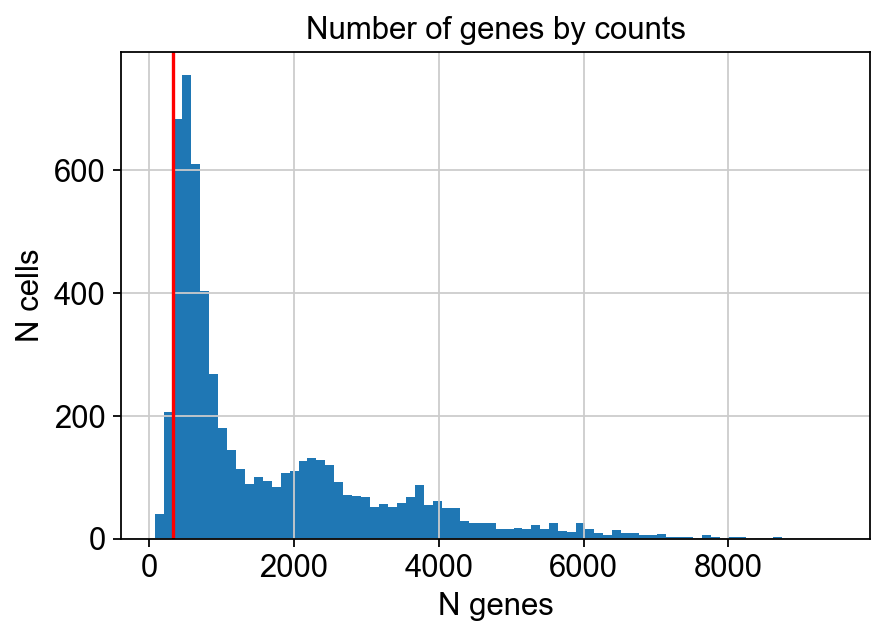

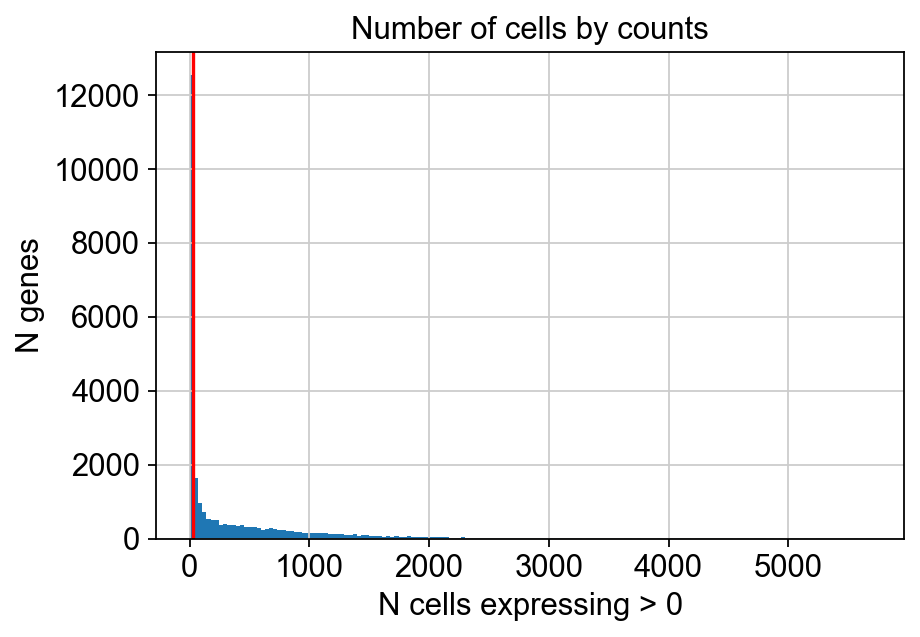

Saved genes_plot plot as RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene_genes_plot.png
Saved cells_plot plot as RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene_cells_plot.png
Genes plot and Cells plot were saved!
Prefix "mt-" found with 37 mitochondrial genes:
['mt-Tf', 'mt-Rnr1', 'mt-Tv', 'mt-Rnr2', 'mt-Tl1', 'mt-Nd1', 'mt-Ti', 'mt-Tq', 'mt-Tm', 'mt-Nd2']
Annotated mitochondrial genes and calculated QC metrics.
Saved genes_counts plot as RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene_violin_genes_counts.png
Saved total_counts plot as RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene_violin_total_counts.png
Saved pct_counts_mt plot as RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene_violin_pct_counts_mt.png
Saved pct_mt_scatter plot as RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene_scatter_pct_mt.png
Saved genes_counts_scatter plot as RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene_scatter_genes_counts.png
Filtered cells based on gene counts with mt_analysis.
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:

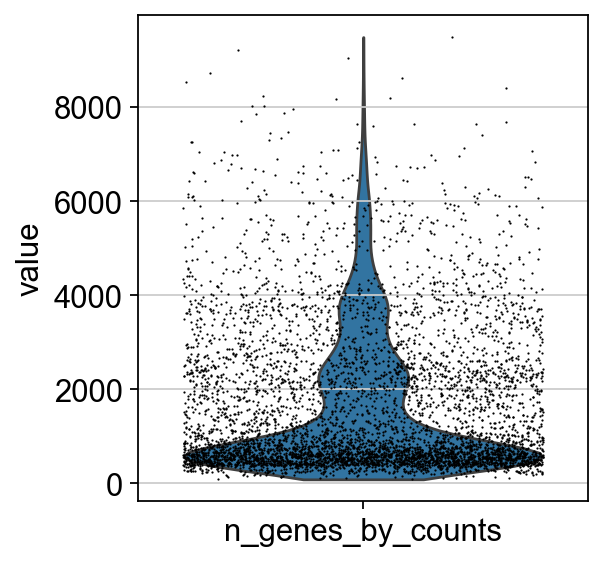

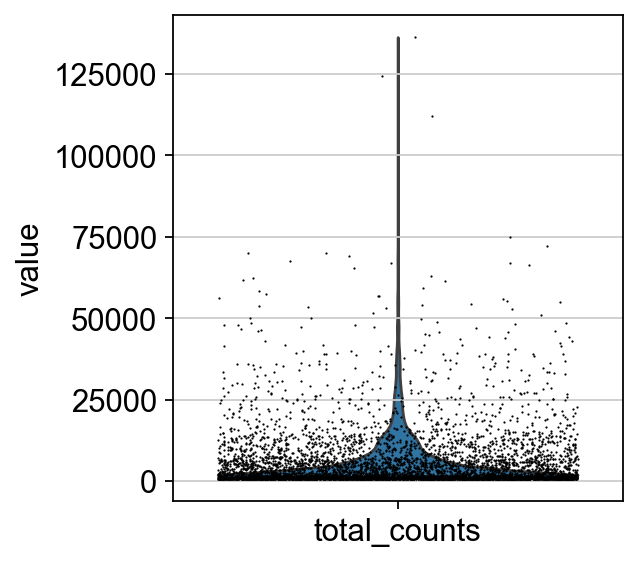

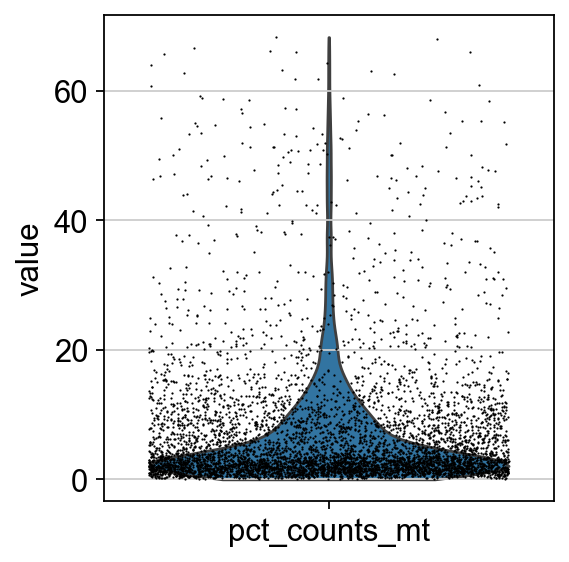

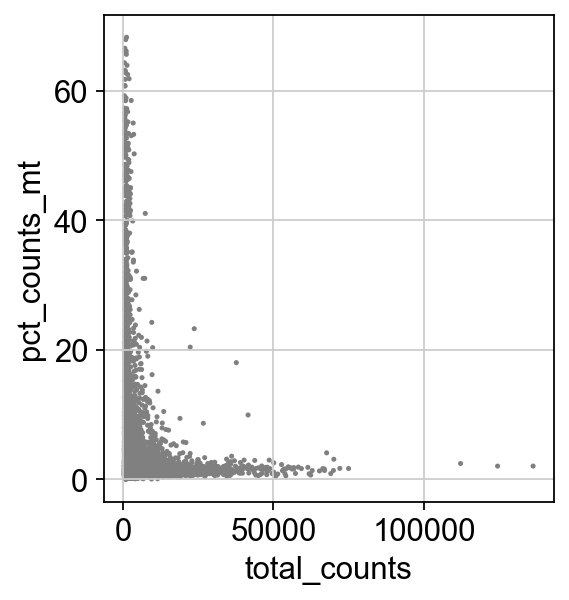

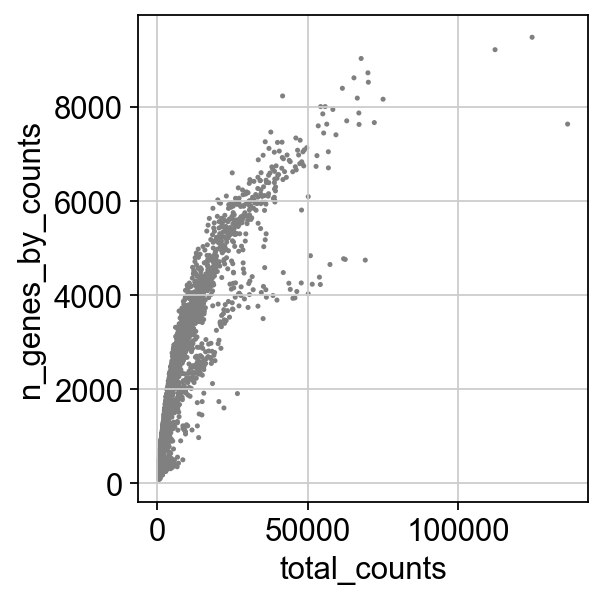

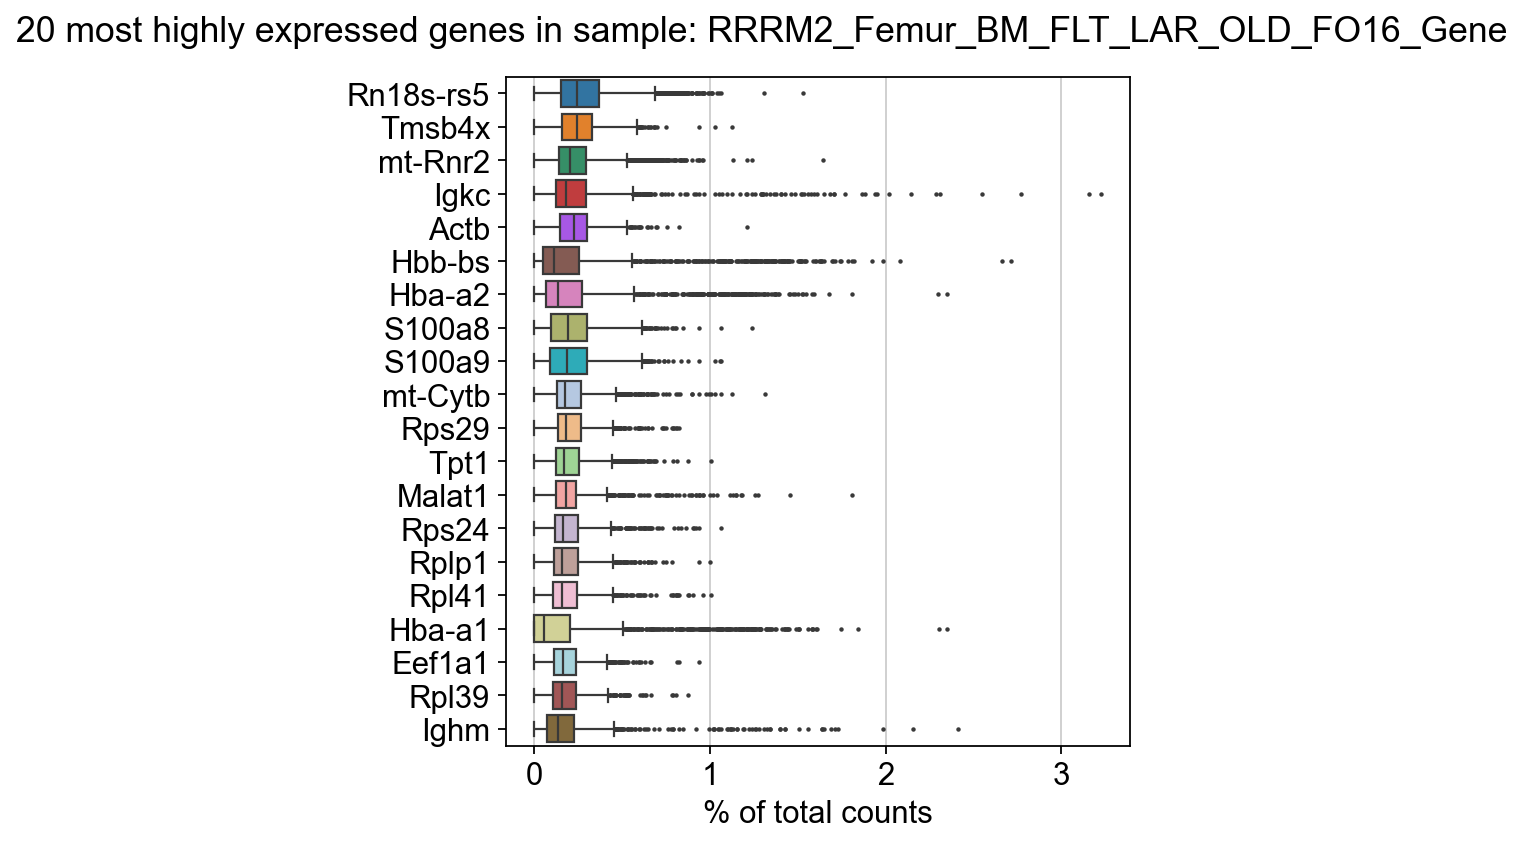

computing PCA
    with n_comps=50
    finished (0:00:01)
Saved PCAplot plot as RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene_PCAplot.png


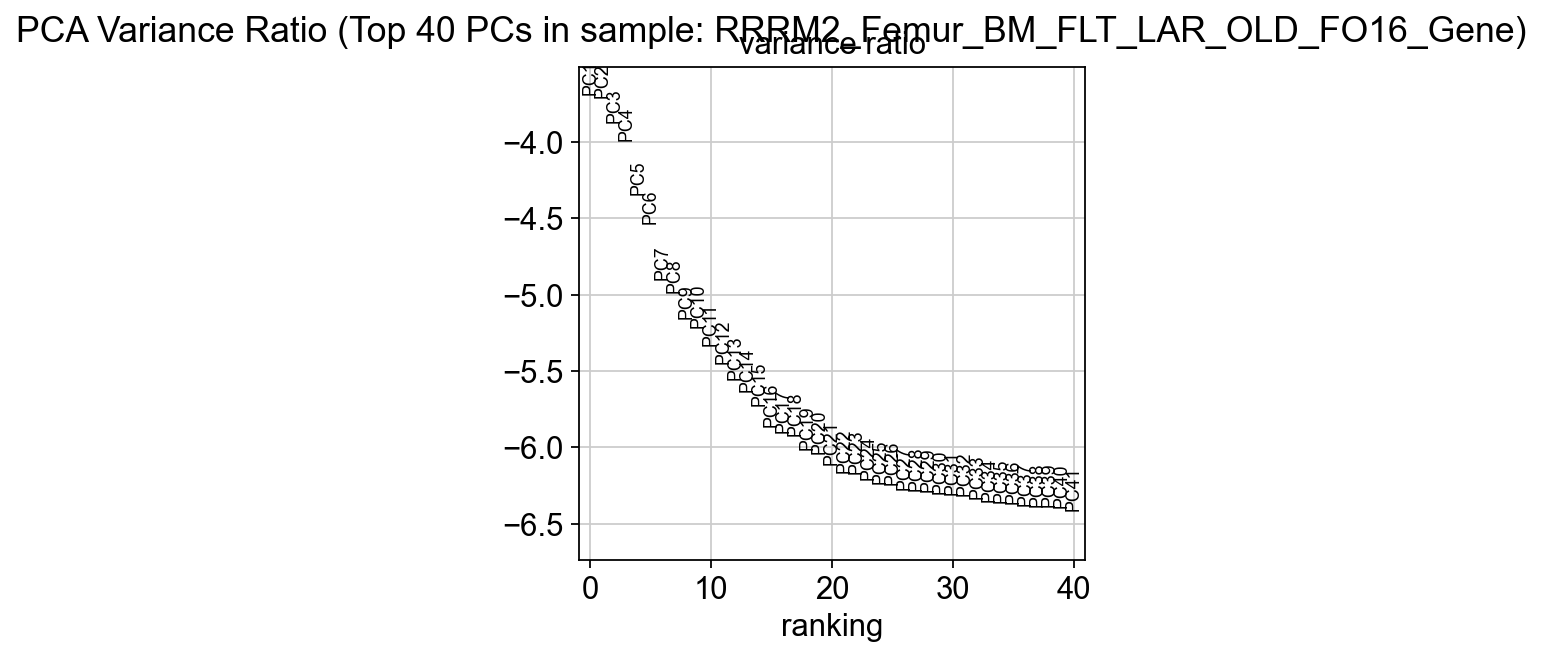

Finished processing RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene. Results saved to RRRM2_Femur_BM_FLT_LAR_OLD_FO16_Gene_results_scoreCT.h5ad

Processing directory: ./test\RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene\filtered
... reading from cache file cache\test-RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene-filtered-matrix.h5ad
Filter out cells expressing fewer than: 251.5 genes (5th percentile)
Filter out genes detected in fewer than: 26.97 cells (1th percentile)
Filtered data saved to RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene_filtered.h5ad
Gene threshold: 251.5
Cell threshold: 26.97


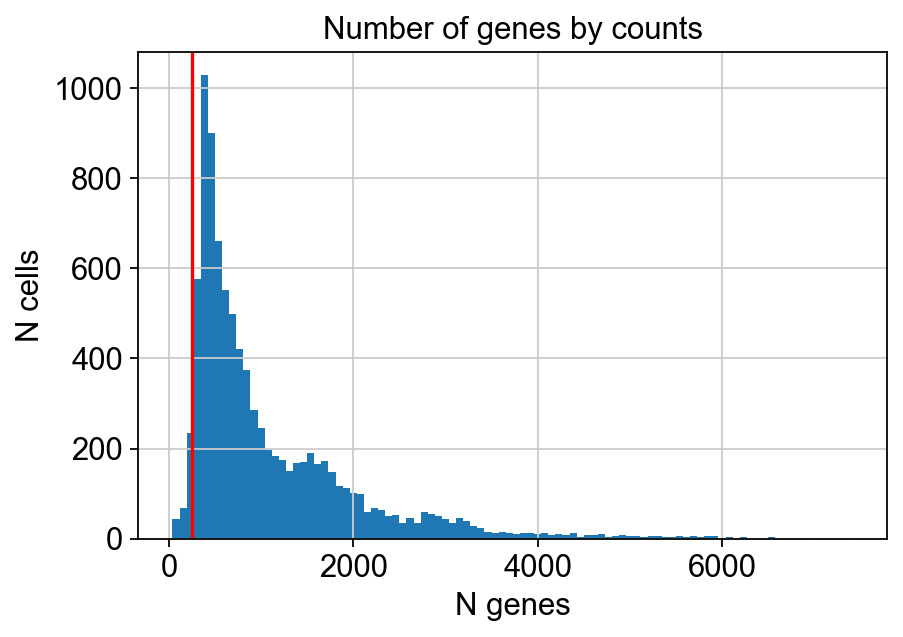

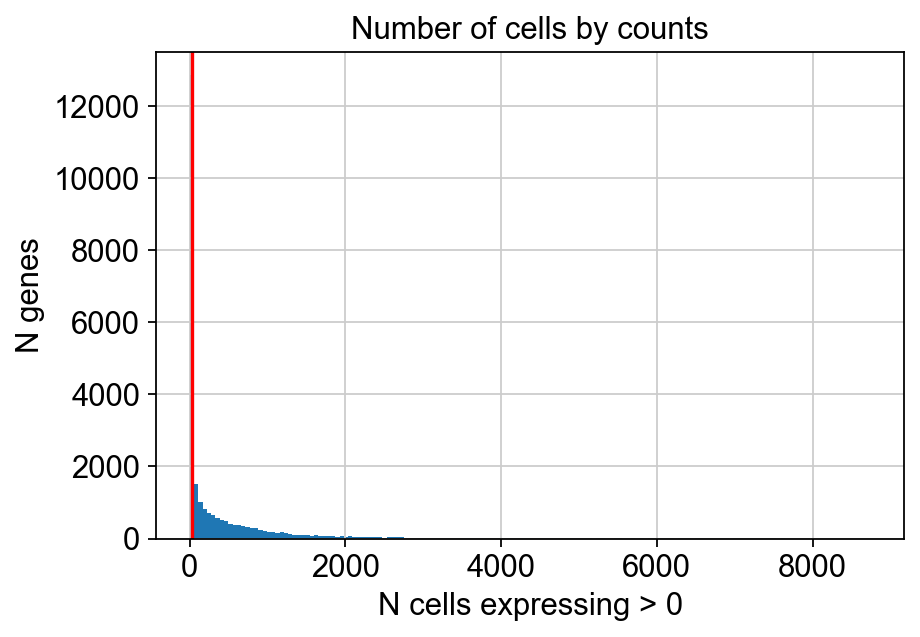

Saved genes_plot plot as RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene_genes_plot.png
Saved cells_plot plot as RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene_cells_plot.png
Genes plot and Cells plot were saved!
Prefix "mt-" found with 37 mitochondrial genes:
['mt-Tf', 'mt-Rnr1', 'mt-Tv', 'mt-Rnr2', 'mt-Tl1', 'mt-Nd1', 'mt-Ti', 'mt-Tq', 'mt-Tm', 'mt-Nd2']
Annotated mitochondrial genes and calculated QC metrics.
Saved genes_counts plot as RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene_violin_genes_counts.png
Saved total_counts plot as RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene_violin_total_counts.png
Saved pct_counts_mt plot as RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene_violin_pct_counts_mt.png
Saved pct_mt_scatter plot as RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene_scatter_pct_mt.png
Saved genes_counts_scatter plot as RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene_scatter_genes_counts.png
Filtered cells based on gene counts with mt_analysis.
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:

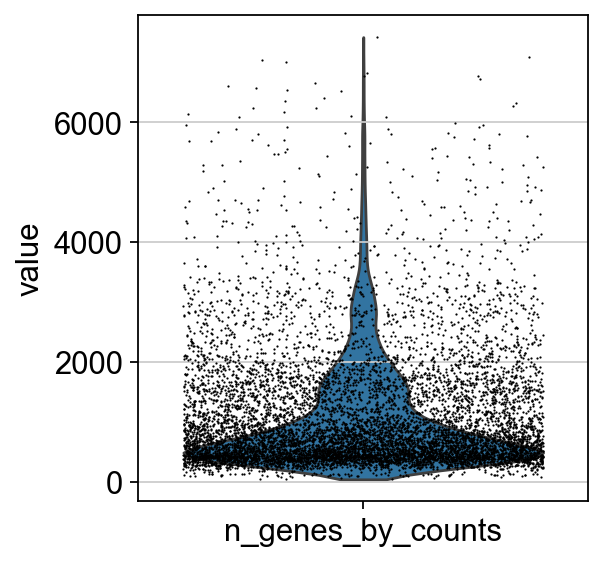

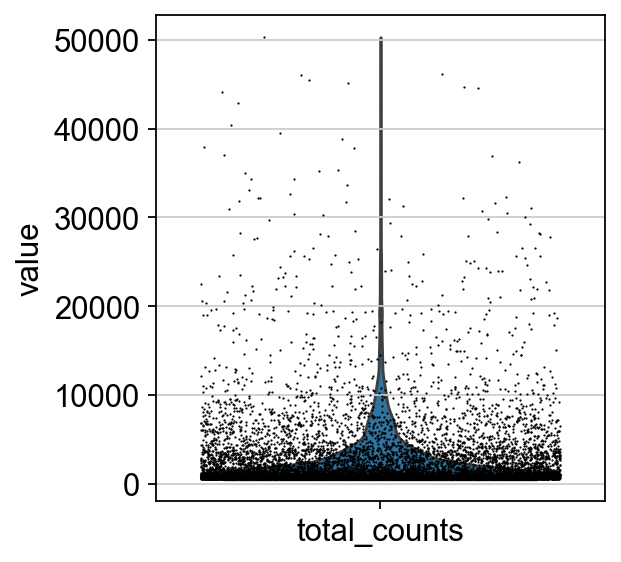

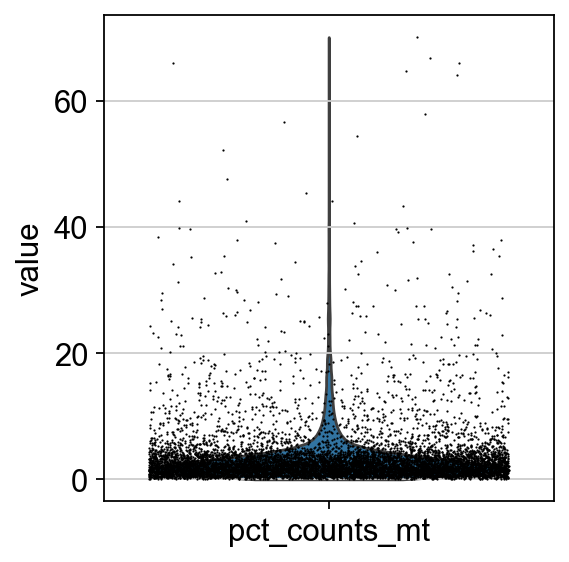

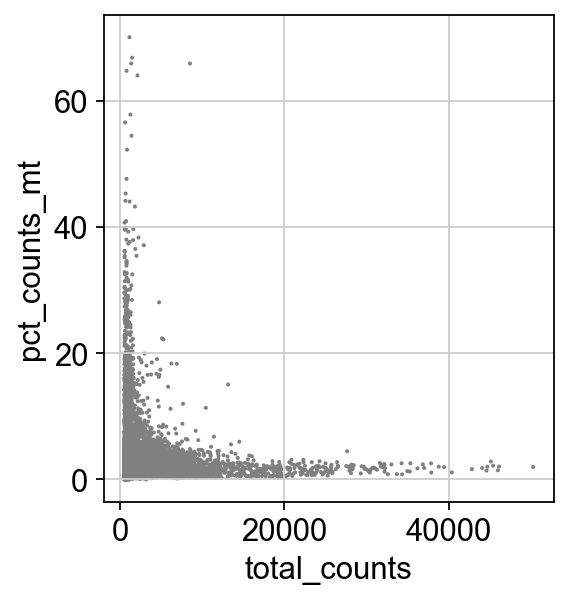

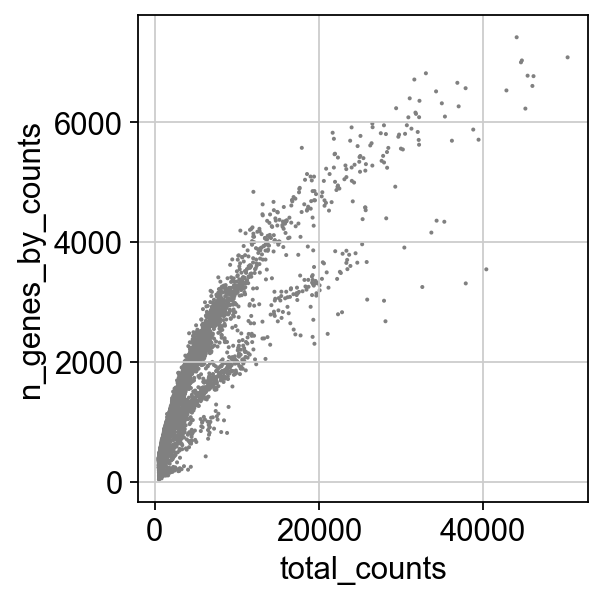

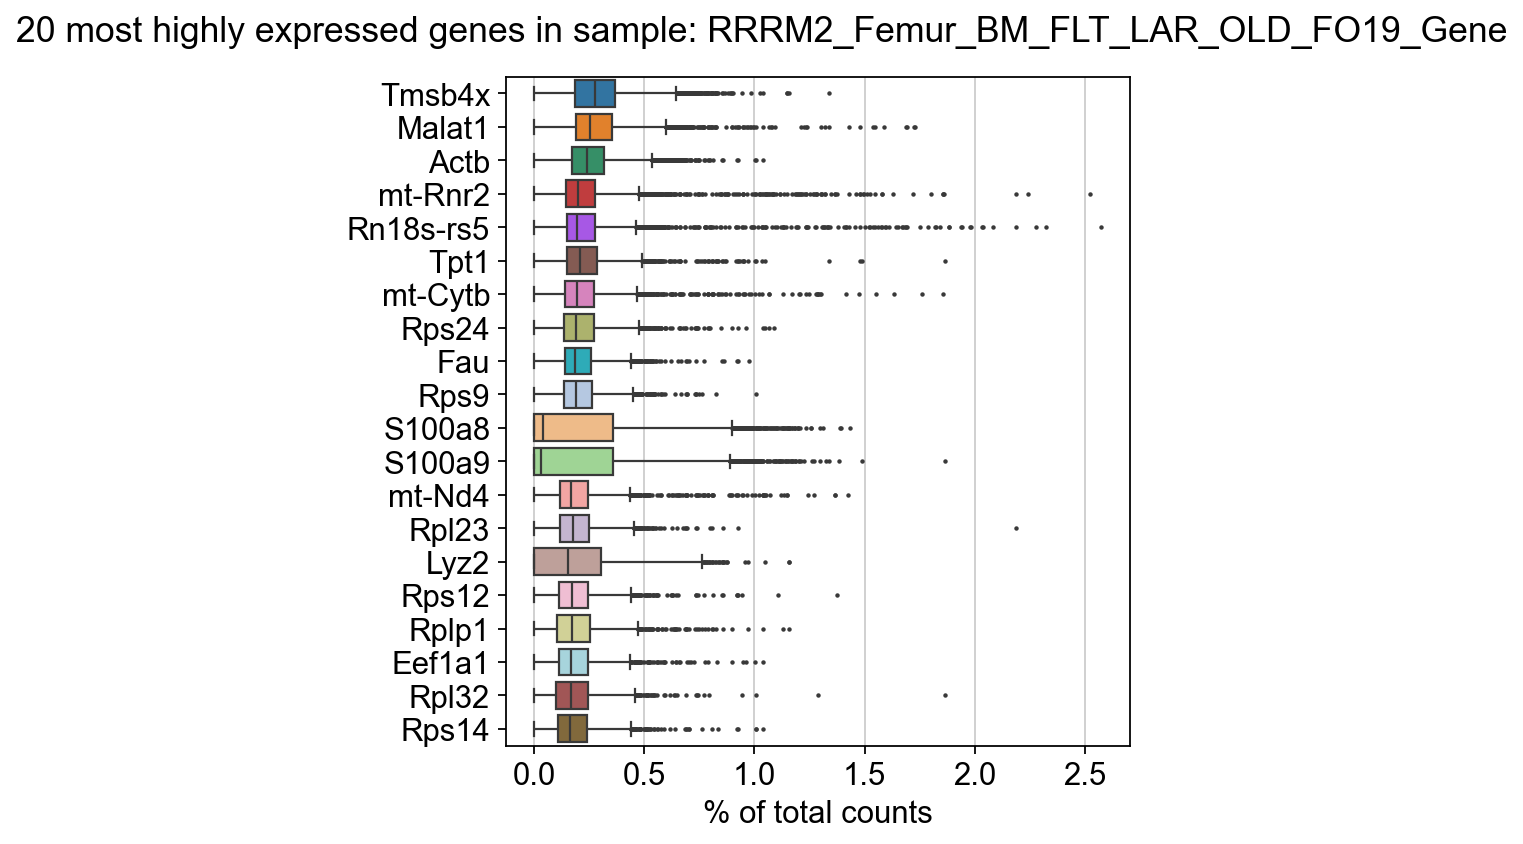

computing PCA
    with n_comps=50
    finished (0:00:01)
Saved PCAplot plot as RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene_PCAplot.png


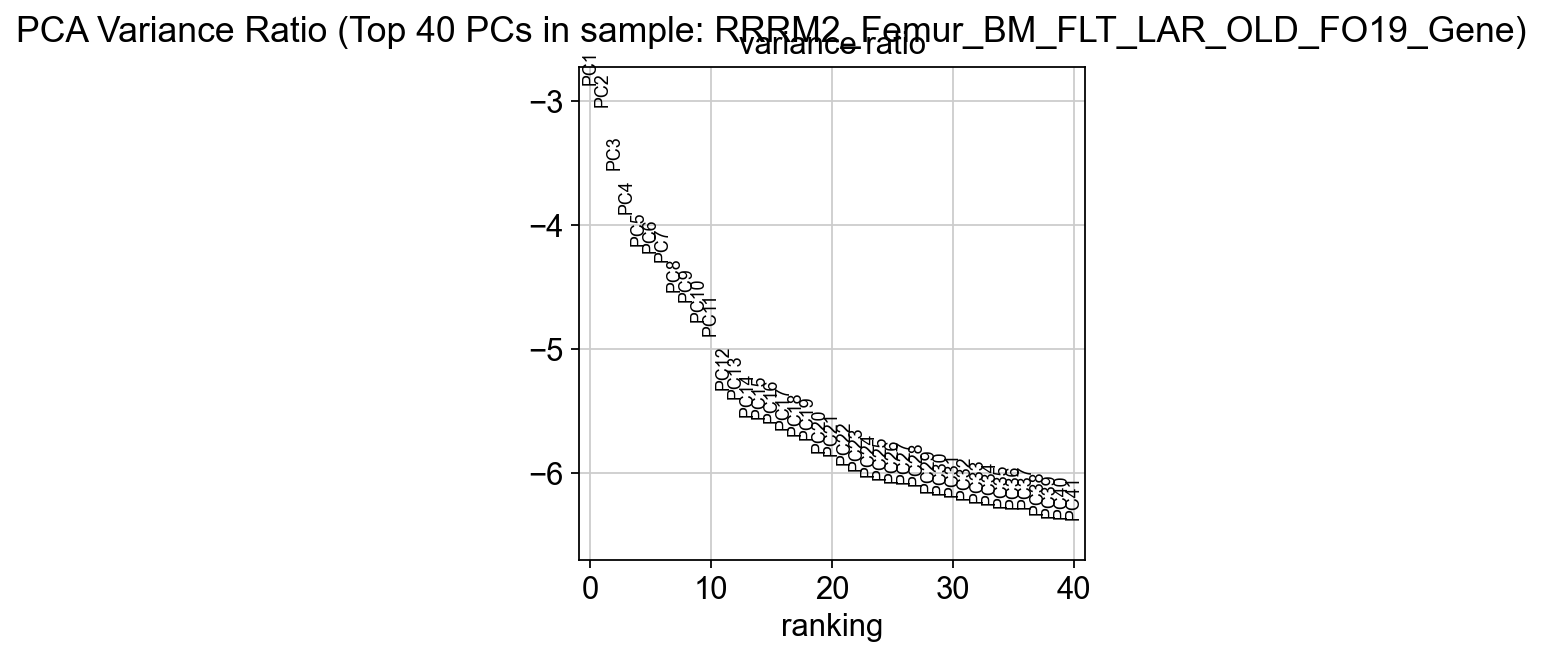

Finished processing RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene. Results saved to RRRM2_Femur_BM_FLT_LAR_OLD_FO19_Gene_results_scoreCT.h5ad



In [826]:
import os
import scanpy as sc

'''This script uses a loop to find all subdirectories
of working directory that contain scRNAseq datasets.
'''

#define basic path:
base_path = './test'
#scanPy marker path
marker_file = 'GL-DPPD-7111_Mmus_BoneMarrow_CellType_GeneMarkers_filtered.gmt'

#create structure of folders:
Structure()

# retrieve directories:
out = []
for root, dirs, files in os.walk(base_path):
    # it was a problem with catching invisible folders, fixed it:
    dirs[:] = [d for d in dirs if not d.startswith('.')]
    # Check if the current directory matches the filtered path
    if 'filtered' in root.split(os.sep):
         out.append(root)
out

# Loop through each subdirectory in the 'out' list
for input_path in out:
    print(f"Processing directory: {input_path}")

    # Load AnnData input file
    adata = sc.read_10x_mtx(input_path, var_names='gene_symbols', cache=True)

    # Define the sample name
    sample_name = os.path.basename(os.path.dirname(input_path))

    # Define the results file for processed AnnData
    results_file = f"{sample_name}_results_scoreCT.h5ad"

    # Module 4
    BasicFiltering(save_data=True)

    # Module 5
    plotCellsAndGenes(save_data=True)

    # Module 6
    mtAnalysis()

    # Module 7
    plotViolinScatter(save_data=True)

    # Module 8
    FilterCells()

    # Module 9
    Normalization(adata)
    #RegressOut(adata)

    # Module 10
    plotPostNormalization(save_data=True)

    # Module 11
    plotPCA(save_data=True)

    # Module 12
    #ClusterAnalysis()

    # Module 13
    #ScoreCTAnnotation(save_data=True)

    # Module 14
    #PlotUMAP("ScoreCT", save_data=True)

    print(f"Finished processing {sample_name}. Results saved to {results_file}\n")


#### Module2: parameters.py

In [722]:
"""
This script stores all necessary default parameters: 
"""

#Basic Filtering parameters:
DEFAULT_GENES_PERCENTILE = 5

DEFAULT_CELLS_PERCENTILE = 1

#Parameters to plot Genes and Cells:
save_format = "png"
save_dpi = 300
genes_plot = True
cells_plot = True

#Parameters for Violin plots etc:
jitter_param = 0.4

#filter cells based on gene counts (basic is 2500):
filter_gene_counts = 2500

#number of pcs in PCA plot:
n_pcs=40

#scoreCT parameters annotation:
null_model_param='multinomial'
cluster_key_param='leiden'

#### Module3: SaveData.py

In [824]:
import matplotlib.pyplot as plt  # Ensure this is imported

def SaveData(adata=None, genes_plot=None, cells_plot=None, mt_analysis=False, 
             genes_counts=None, total_counts=None, pct_counts_mt=None, 
             pct_mt_scatter=None, genes_counts_scatter=None, postNormplot = None, PCAplot=None, scoreCT_out=None, umap=None):

    # Create folders if they do not exist
    if not os.path.exists('AnnData'):
        os.makedirs('AnnData')
    
    if not os.path.exists('plots'):
        os.makedirs('plots')
        
    if adata is not None:
        adata.write(f"AnnData/{sample_name}_filtered.h5ad")
        print(f"Filtered data saved to {sample_name}_filtered.h5ad")
    
    if genes_plot is not None:
        genes_plot.figure.savefig(f"plots/{sample_name}_genes_plot.{save_format}", dpi=save_dpi)
        print(f"Saved genes_plot plot as {sample_name}_genes_plot.{save_format}")

    if cells_plot is not None:
        cells_plot.figure.savefig(f"plots/{sample_name}_cells_plot.{save_format}", dpi=save_dpi)
        print(f"Saved cells_plot plot as {sample_name}_cells_plot.{save_format}")
        
    if genes_counts is not None:
        genes_counts.figure.savefig(f"plots/{sample_name}_violin_genes_counts.{save_format}", dpi=save_dpi)
        print(f"Saved genes_counts plot as {sample_name}_violin_genes_counts.{save_format}")

    if total_counts is not None:
        total_counts.figure.savefig(f"plots/{sample_name}_violin_total_counts.{save_format}", dpi=save_dpi)
        print(f"Saved total_counts plot as {sample_name}_violin_total_counts.{save_format}")

    if pct_counts_mt is not None:
        pct_counts_mt.figure.savefig(f"plots/{sample_name}_violin_pct_counts_mt.{save_format}", dpi=save_dpi)
        print(f"Saved pct_counts_mt plot as {sample_name}_violin_pct_counts_mt.{save_format}")

    if pct_mt_scatter is not None:
        pct_mt_scatter.figure.savefig(f"plots/{sample_name}_scatter_pct_mt.{save_format}", dpi=save_dpi)
        print(f"Saved pct_mt_scatter plot as {sample_name}_scatter_pct_mt.{save_format}")

    if genes_counts_scatter is not None:
        genes_counts_scatter.figure.savefig(f"plots/{sample_name}_scatter_genes_counts.{save_format}", dpi=save_dpi)
        print(f"Saved genes_counts_scatter plot as {sample_name}_scatter_genes_counts.{save_format}")

    if postNormplot is not None:
        postNormplot.figure.savefig(f"plots/{sample_name}_HighlyExpressedGenes.{save_format}", dpi=save_dpi)
        print(f"Saved HighlyExpressedGenes plot as {sample_name}_HighlyExpressedGenes.{save_format}")

    if PCAplot is not None:
        PCAplot.figure.savefig(f"plots/{sample_name}_PCAplot.{save_format}", dpi=save_dpi)
        print(f"Saved PCAplot plot as {sample_name}_PCAplot.{save_format}")

    if scoreCT_out is not None:
        scoreCT_out.write(f"AnnData/{sample_name}_annotated.h5ad")
        print(f"Annotated data saved to {sample_name}_annotated.h5ad")

    if umap is not None:
        umap.figure.savefig(f"plots/{sample_name}_UMAP.{save_format}", dpi=save_dpi)
        print(f"Saved UMAP plot as {sample_name}_UMAP.{save_format}")

#### Module4: BasicFiltering.py

In [577]:
import numpy as np
import scanpy as sc

def BasicFiltering(genes_percentile=None, cells_percentile=None, save_data=False):

    # Calculate QC metrics
    stat = sc.pp.calculate_qc_metrics(adata, inplace=False)
    cdf = stat[0]
    gdf = stat[1]

    # Use user-specified percentiles or defaults
    genes_percentile = genes_percentile if genes_percentile is not None else DEFAULT_GENES_PERCENTILE
    cells_percentile = cells_percentile if cells_percentile is not None else DEFAULT_CELLS_PERCENTILE

    # Calculate thresholds
    genes = list(set(cdf['n_genes_by_counts']))
    cells = list(set(gdf['n_cells_by_counts']))

    gene_threshold = np.percentile(genes, genes_percentile)
    cell_threshold = np.percentile(cells, cells_percentile)

    # Save the thresholds in adata.uns
    adata.uns['gene_threshold'] = gene_threshold
    adata.uns['cell_threshold'] = cell_threshold
    
    print(f'Filter out cells expressing fewer than: {gene_threshold} genes ({genes_percentile}th percentile)')
    print(f'Filter out genes detected in fewer than: {cell_threshold} cells ({cells_percentile}th percentile)')

    # Save adata if requested
    if save_data:
        SaveData(adata=adata)
    return adata
    

#### Module5: plotCellsAndGenes.py
Plot 1 and 2: Distribution plot of genes vs cells and cells vs genes:

In [823]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc

def plotCellsAndGenes(genes_plot=genes_plot, cells_plot=cells_plot, save_data=False):
  
    # Calculate QC metrics based on the filtered adata from BasicFiltering
    stat = sc.pp.calculate_qc_metrics(adata, inplace=False)
    cell_qc_dataframe = stat[0]
    gene_qc_dataframe = stat[1]

    # Retrieve the filtering thresholds from the adata object after BasicFiltering
    gene_threshold = adata.uns.get('gene_threshold', None)
    cell_threshold = adata.uns.get('cell_threshold', None)
    
    if gene_threshold is None or cell_threshold is None:
        raise ValueError("Filtering thresholds not found in the adata object. Ensure BasicFiltering was run.")

    print(f'Gene threshold: {gene_threshold}')
    print(f'Cell threshold: {cell_threshold}')

    # Unique variables for plot data
    genes_plot_data = None
    cells_plot_data = None

    # Plot Number of Genes by Counts (only if genes_plot is True)
    if genes_plot:
        fig, ax = plt.subplots(figsize=(6, 4))  # Create a new figure for genes plot
        ax.hist(cell_qc_dataframe['n_genes_by_counts'], bins="sqrt")
        ax.set(xlabel='N genes', ylabel='N cells')
        ax.axvline(gene_threshold, color='red')
        ax.set_title("Number of genes by counts")
        plt.show()
        genes_plot_data = fig  # Store figure for later use

    # Plot Number of Cells by Counts (only if cells_plot is True)
    if cells_plot:
        fig, ax = plt.subplots(figsize=(6, 4))  # Create a new figure for cells plot
        ax.hist([int(x) for x in gene_qc_dataframe['n_cells_by_counts'] if x != 0], bins="sqrt")
        ax.set(xlabel='N cells expressing > 0', ylabel='N genes')
        ax.axvline(cell_threshold, color='red')
        ax.set_title("Number of cells by counts")
        plt.show()
        cells_plot_data = fig  # Store figure for later use
    
    if save_data:
        SaveData(genes_plot=genes_plot_data, cells_plot=cells_plot_data)
        print(f"Genes plot and Cells plot were saved!")
    

#### Module6: mtAnalysis.py
* Annotate mitochondrial genes (optional)

In [802]:
import os
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def mtAnalysis(analysis=True, save_mt=False):

    if analysis:
        # Check for common mitochondrial gene prefixes in the first 50 gene names
        mitochondrial_prefixes = ["MT-", "mt-", "M-", "m-", "mito-", "MITO-"]
        for prefix in mitochondrial_prefixes:
            mt_genes = [gene for gene in adata.var_names if gene.startswith(prefix)]
            if mt_genes:
                print(f'Prefix "{prefix}" found with {len(mt_genes)} mitochondrial genes:')
                print(mt_genes[:10])  # Print the first 10 mitochondrial genes found
                # Annotate mitochondrial genes as "mt"
                adata.var["mt"] = adata.var_names.str.startswith(prefix)
                break
            # Add flag to indicate mitochondrial analysis was performed
            adata.uns['mt_analysis'] = True
        
        else:
            print("No common mitochondrial gene prefix found in the first 50 gene names.")
            adata.var["mt"] = False  # No mitochondrial genes found

        # Calculate QC metrics including mitochondrial genes
        sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)
        print(f"Annotated mitochondrial genes and calculated QC metrics.")
    else:
        # Perform QC metrics calculation without mitochondrial gene annotation
        sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
        print(f"Calculated QC metrics.")

    # Freeze current state for saving
    adata_frozen = adata.copy()

    # Save data if requested
    if save_mt:
        SaveData(adata=adata_frozen, mt_analysis=True)

    return adata

#### Module7: plotViolinScatter.py
- title does not work

In [582]:
import matplotlib.pyplot as plt
import scanpy as sc

def plotViolinScatter(genes_counts=True, total_counts=True, pct_counts_mt=True, pct_mt_scatter=True, genes_counts_scatter=True, save_data=False):

    plots_data = {}

    # Collect generated plots for saving
    genes_counts_fig = None
    total_counts_fig = None
    pct_counts_mt_fig = None
    pct_mt_scatter_fig = None
    genes_counts_scatter_fig = None
    
    # Violin plots
    if genes_counts:
        genes_counts_fig = sc.pl.violin(adata, "n_genes_by_counts", jitter=jitter_param, show=False)

    
    if total_counts:
        total_counts_fig = sc.pl.violin(adata, "total_counts", jitter=jitter_param, show=False)
       
    if pct_counts_mt:
        if "pct_counts_mt" in adata.obs:
            pct_counts_mt_fig = sc.pl.violin(adata, "pct_counts_mt", jitter=jitter_param, show=False)
           
    # Scatter plots
    if pct_mt_scatter:
        pct_mt_scatter_fig = sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt", show=False)
       
    if genes_counts_scatter:
        genes_counts_scatter_fig = sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts", show=False)
        
    # Save data if requested
    if save_data:
       SaveData(
           genes_counts=genes_counts_fig,
           total_counts=total_counts_fig,
           pct_counts_mt=pct_counts_mt_fig,
           pct_mt_scatter=pct_mt_scatter_fig,
           genes_counts_scatter=genes_counts_scatter_fig
       )

#### Module8: FilterCells.py

In [803]:
import scanpy as sc

def FilterCells():
    global adata

    # Check if 'mt_analysis' exists in adata.uns and is True
    if 'mt_analysis' in adata.uns and adata.uns['mt_analysis'] == True:
        # Filter cells based on gene counts and mitochondrial content
        adata = adata[adata.obs.n_genes_by_counts < filter_gene_counts, :]
        adata = adata[adata.obs.pct_counts_mt < 5, :].copy()  # Assuming you want to filter out cells with more than 5% mitochondrial genes
        print(f"Filtered cells based on gene counts with mt_analysis.")
    else:
        # Filter cells based only on gene counts
        adata = adata[adata.obs.n_genes_by_counts < filter_gene_counts, :]
        print(f"Filtered cells based on gene counts.")

#### Module9: Normalization.py & RegressOut.py

In [647]:
import numpy as np
import scanpy as sc

def Normalization(adata):
    """
    Normalize and preprocess the AnnData object.

    Returns:
    - Processed AnnData object.
    """

    
    # Correct for library size:
    sc.pp.normalize_total(adata, target_sum=1e4)

    # Perform log transformation:
    sc.pp.log1p(adata)

    # Identify highly variable genes:
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

    # Freeze state:
    adata.raw = adata.copy()

    return adata

In [651]:
import numpy as np
import scanpy as sc

def RegressOut(adata):
    
    # Subset the data to include only highly variable genes:
    adata = adata[:, adata.var.highly_variable]

    # Check if mitochondrial analysis has been performed by checking adata.uns['mt_analysis']
    if 'mt_analysis' in adata.uns and adata.uns['mt_analysis'] == True:
        # Regress out total counts and mitochondrial gene percentages
        sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])
    else:
        # Only regress out total counts if mitochondrial analysis wasn't run
        sc.pp.regress_out(adata, "total_counts")

    # Scale the data
    sc.pp.scale(adata, max_value=10)
    
    return adata

#### Module10: plotPostNormalization.py

In [804]:
import scanpy as sc
import matplotlib.pyplot as plt

def plotPostNormalization(save_data=False):
    
    global adata
    
    ax = sc.pl.highest_expr_genes(adata, n_top=20, show=False)
    
    # Set the title of the plot
    plt.suptitle(f"20 most highly expressed genes in sample: {sample_name}", fontsize=16)
    
    # If `save_data` is True, save the plot via SaveData function
    if save_data:
        postNormplot = ax.figure  # Store the plot figure
        SaveData(postNormplot=postNormplot)
    
    # Display the plot
    plt.show()

#### Module11: plotPCA.py

In [778]:
import matplotlib.pyplot as plt
import scanpy as sc

def plotPCA(save_data=False):
    
    global adata

 
    #Calculate PCA:
    sc.tl.pca(adata, svd_solver="arpack")
    sc.pl.pca_variance_ratio(adata, log=True, n_pcs = n_pcs, show=False)

    #title is not working...
    fig = plt.gcf()

    plt.suptitle(f"PCA Variance Ratio (Top {n_pcs} PCs in sample: {sample_name})", fontsize=16)
    fig.subplots_adjust(top=0.9)

    if save_data:
        plt.draw()
        SaveData(PCAplot=fig)
    
    
    plt.show()

#### Module12: ClusterAnalysis.py

In [805]:
import scanpy as sc

def ClusterAnalysis():

    global adata
    #compute neighbor graph
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=n_pcs)
    
    #Embed graph into 2 dimensions using UMAP:
    sc.tl.umap(adata)
    
    #perfom leiden clustering:
    sc.tl.leiden(adata)
    
    #compute ranking for highly expressed genes:
    sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon")

    return adata

#### Module13: ScoreCTAnnotation.py

In [786]:
#annotate with scoreCT:
import scanpy as sc
import pandas as pd

def ScoreCTAnnotation(save_data=False):
    
    scoreCT_out = ct.scorect(adata,
               marker_path= marker_file, 
               K_top=300,
               m_bins=5,
               null_model=null_model_param,
               cluster_key=cluster_key_param)
    
    if save_data:
        SaveData(scoreCT_out=scoreCT_out)

#### Module14: PlotUMAP.py

In [774]:
import scanpy as sc
import matplotlib.pyplot as plt

def PlotUMAP(color, save_data= False):
    
    global adata
    
    sc.pl.umap(adata, color=[color], title=[f"UMAP of: {sample_name}"], use_raw=False,wspace=0.33, show=False)
    
    #save umap:
    umap = plt.gcf()
    
    if save_data:
        SaveData(umap=umap)
        print(f"Data was saved!")
    plt.show()